# Import and format BTC price data

In [9]:
import pandas as pd

btc_3_months = pd.read_csv("data/BTC-USD-Sep-Dec-2021.csv")
btc_3_months

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-01,47099.773438,49111.089844,46562.437500,48847.027344,48847.027344,39139399125
1,2021-09-02,48807.847656,50343.421875,48652.320313,49327.722656,49327.722656,39508070319
2,2021-09-03,49288.250000,50982.273438,48386.085938,50025.375000,50025.375000,43206179619
3,2021-09-04,50009.324219,50545.582031,49548.781250,49944.625000,49944.625000,37471327794
4,2021-09-05,49937.859375,51868.679688,49538.597656,51753.410156,51753.410156,30322676319
...,...,...,...,...,...,...,...
117,2021-12-27,50802.609375,51956.328125,50499.468750,50640.417969,50640.417969,24324345758
118,2021-12-28,50679.859375,50679.859375,47414.210938,47588.855469,47588.855469,33430376883
119,2021-12-29,47623.871094,48119.742188,46201.496094,46444.710938,46444.710938,30049226299
120,2021-12-30,46490.605469,47879.964844,46060.312500,47178.125000,47178.125000,26686491018


In [40]:
import numpy as np

# create averages from high and low price per day
avgs = []
for i in range(122):
    avgs.append((btc_3_months.iloc[i]["High"] + btc_3_months.iloc[i]["Low"])  / 2)

## Graphing average price per day
### For the period 1st Sep to 31st Dec 2021

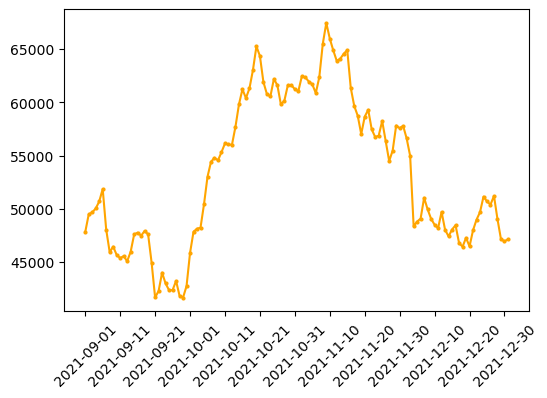

In [37]:
import matplotlib.pyplot as plt

fig = plt.figure(dpi=100)

plt.plot(avgs, marker='o', markersize=2, color='orange')
plt.xticks(ticks=range(0, 122, 10), labels=btc_3_months["Date"][::10], rotation=45)

plt.show()

## Adding API sentiment-tagged data

In [88]:
btc_17_23 = pd.read_csv("data/BTC-USD.csv")

api = pd.read_csv("data/api_tagged.csv").drop(columns=["Unnamed: 0"])

api_avgs = []
for i in range(7):
    api_avgs.append((btc_17_23.iloc[i]["High"] + btc_17_23.iloc[i]["Low"])  / 2)

In [89]:
import datetime as dt

api["Date"] = pd.to_datetime(api["Date"], format="%Y-%m-%d")

api_sents = []
for i in range(7):
    t = pd.Timestamp(2022, 5, 17)
    x = api[api["Date"] == t + dt.timedelta(days=i)]
    api_sents.append(x["Sentiment"].mean())
    
api_sents

[0.22858979413856817,
 0.19518298406258683,
 0.2025153113461083,
 0.2084084943629871,
 0.21276628976928996,
 0.24033291458525605,
 0.2321110975661274]

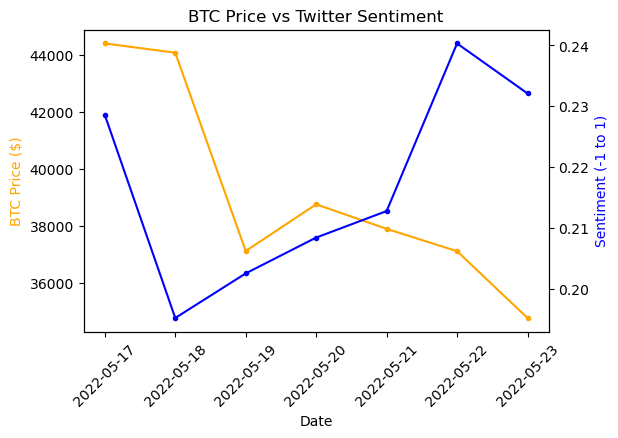

In [90]:
dates = np.sort(api["Date"].astype(str).unique())

# Combine figures into one dataframe
df = pd.DataFrame({"Date": dates, "BTC Price": api_avgs, "Sentiment": api_sents})

# Price line
fig, ax1 = plt.subplots()
ax1.plot(df.index, df['BTC Price'], color="orange",  marker=".", ms=6)

# Sentiment line
ax2 = ax1.twinx()
ax2.plot(df.index, df['Sentiment'], color="blue", marker=".", ms=6)

# Formatting
plt.title("BTC Price vs Twitter Sentiment")

ax1.set_ylabel('BTC Price ($)', color="orange")
ax2.set_ylabel('Sentiment (-1 to 1)', color="blue")

ax1.set_xlabel('Date')

ax1.xaxis.set_ticks(range(7))
ax1.set_xticklabels(dates, rotation=45)

fig.set_dpi(100)


plt.show()

Seems mildly correlated?

# BIG tagged data

In [44]:
big = pd.read_csv("data/big_tagged.csv").drop(columns=["Unnamed: 0"])
big

,Tweet,Date,Sentiment
0,bitcointrustbct i hope it a great project. and...,2021-08-26,1.100450
1,jobcashofficial good project airdropinside pan...,2021-08-26,0.658448
2,jobcashofficial nice project be implement very...,2021-08-26,0.796862
3,bitcoin atm illinoisfunded coinflip new compli...,2021-08-26,0.141093
4,what be the third part of the holy trinity? ah...,2021-08-26,0.284733
...,...,...,...
798995,georgehahn jerrysaltz ill be buy crypto!!! my ...,2021-12-30,0.456743
798996,the late bitcoin block with transaction be jus...,2021-12-30,-0.550294
798997,saylor wonder what historical event happen in ...,2021-12-30,0.219389
798998,happy new year eve everyone xcad zil btc,2021-12-30,0.595357


In [52]:
import datetime as dt

big["Date"] = pd.to_datetime(big["Date"], format="%Y-%m-%d")

sents = []
for i in range(122):
    t = pd.Timestamp(2021, 9, 1) + dt.timedelta(days=i)
    x = big[big["Date"] == t]
    sents.append(x["Sentiment"].mean())


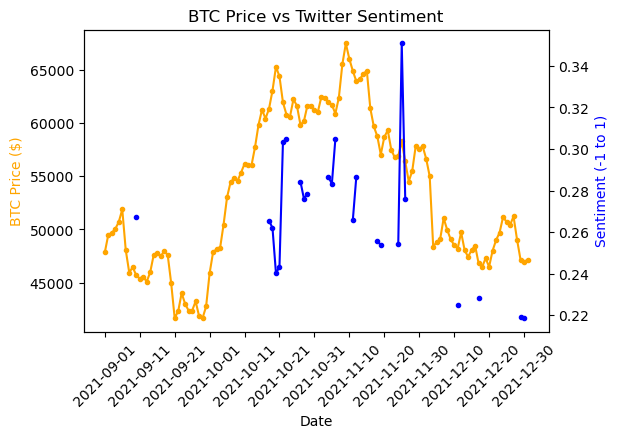

In [82]:
dates = pd.to_datetime(pd.Series(pd.date_range(start="2021-09-01",end="2021-12-31"))).dt.date

# Combine figures into one dataframe
df = pd.DataFrame({"Date": dates, "BTC Price": avgs, "Sentiment": sents})

# Price line
fig, ax1 = plt.subplots()
ax1.plot(df.index, df['BTC Price'], color="orange",  marker=".", ms=6)

# Sentiment line
ax2 = ax1.twinx()
ax2.plot(df.index, df['Sentiment'], color="blue", marker=".", ms=6)

# Formatting
plt.title("BTC Price vs Twitter Sentiment")

ax1.set_ylabel('BTC Price ($)', color="orange")
ax2.set_ylabel('Sentiment (-1 to 1)', color="blue")

ax1.set_xlabel('Date')

ax1.xaxis.set_ticks(range(0, 122, 10))
ax1.set_xticklabels(dates[::10], rotation=45)

fig.set_dpi(100)


plt.show()